# Questão 3

Considere  o  processo  de  identificação  de  aglomerados  (“clusters”)  com  base  em  uma técnica  hierárquica  aglomerativa.  Neste  problema  considere  o  método  de  Ward  resumido nas   equações abaixo.   Considere   também dois   critérios   para   parada   do   processo aglomerativo no dendrograma e identificação do número de aglomerados. O critério R2 e o critério Pseudo  T2.   Como  dados  para  o  problema considere a tabela de índices  de desenvolvimento  de países.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

dataset = pd.read_csv('q3_data.csv')
dataset.head()


,pais,expectativa_de_vida,educacao,pib,estabilidade_politica
0,Reino Unido,0.88,0.99,0.91,1.10
1,Austrália,0.90,0.99,0.93,1.26
2,Canadá,0.90,0.98,0.94,1.24
3,Estados Unidos,0.87,0.98,0.97,1.18
4,Japão,0.93,0.93,0.93,1.20


## Método de Ward

### a) Inicialmente, cada elemento é considerado como um único conglomerado

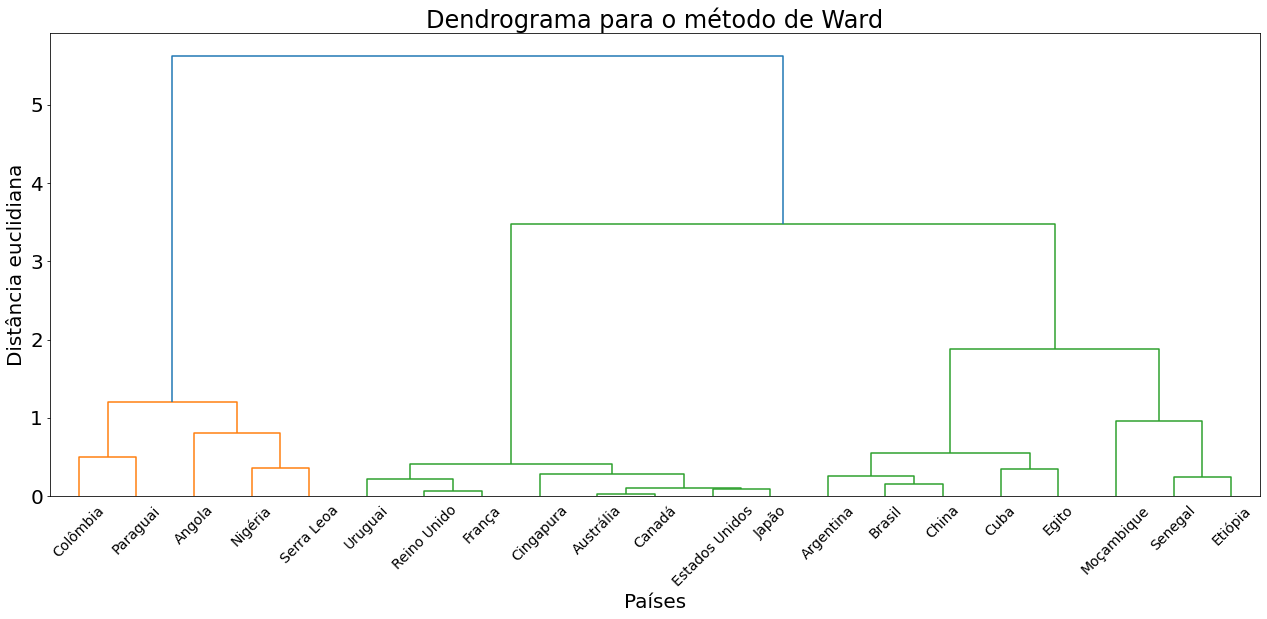

In [34]:
import scipy.cluster.hierarchy as sch

plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(figsize=(18, 9))

linkage = sch.linkage(dataset.drop('pais', axis=1), method='ward') 

dendrogram = sch.dendrogram(
    linkage, 
    labels=list(dataset.pais),
    ax=axes
)

axes.set(
    title='Dendrograma para o método de Ward',
    xlabel='Países',
    ylabel='Distância euclidiana'
)

plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

### b) Em cada passo do algoritmo de agrupamento (formação do dendograma) calcule a similaridade fazendo uso da distância Euclidiana ao quadrado entre os conglomerados formados


In [44]:
intermediate_cluster = {}

for row in linkage:
    row_0, row_1 = int(row[0]), int(row[1])

    if(row_0 >= 38 or row_1 >= 38):
        break

    if(row_0 < 20 and row_1 < 20):
        elm_0 = dataset.pais[row_0]
        elm_1 = dataset.pais[row_1]        
        
        if(len(intermediate_cluster) == 0):
            intermediate_cluster[21] = f'{elm_0} + {elm_1}'

            print(f'Creating cluster: {elm_0} + {elm_1}\n\tDistance: {row[2]:.3f}\n\tElements: {row[3]}\n')

        else:
            idx = list(intermediate_cluster.keys())[-1] + 1
            intermediate_cluster[idx] = f'{elm_0} + {elm_1}'

            print(f'Creating cluster: {elm_0} + {elm_1}\n\tDistance: {row[2]:.3f}\n\tElements: {row[3]}\n')

    elif(row_0 > 20 and row_1 < 20):
        elm_0 = intermediate_cluster[row_0]
        elm_1 = dataset.pais[row_1]

        idx = list(intermediate_cluster.keys())[-1] + 1
        intermediate_cluster[idx] = f'"{elm_0}" + {elm_1}'

        print(f'Joining cluster "{elm_0}" with {elm_1}\n\tDistance: {row[2]:.3f}\n\tElements: {row[3]}\n')

    elif(row_0 < 20 and row_1 > 20):
        elm_0 = dataset.pais[row_0]
        elm_1 = intermediate_cluster[row_1] 

        idx = list(intermediate_cluster.keys())[-1] + 1
        intermediate_cluster[idx] = f'{elm_0} + "{elm_1}"'

        print(f'Combining {elm_0} with cluster "{elm_1}"\n\tDistance: {row[2]:.3f}\n\tElements: {row[3]}\n')

    elif(row_0 > 20 and row_1 > 20):

        elm_0 = intermediate_cluster[row_0]
        elm_1 = intermediate_cluster[row_1]

        idx = list(intermediate_cluster.keys())[-1] + 1
        intermediate_cluster[idx] = f'"{elm_0}" + "{elm_1}"'

        print(f'Joining clusters "{elm_0}" with "{elm_1}"\n\tDistance: {row[2]:.3f}\n\tElements: {row[3]}\n')




Creating cluster: Austrália + Canadá
	Distance: 0.024
	Elements: 2.0

Creating cluster: Reino Unido + França
	Distance: 0.065
	Elements: 2.0

Creating cluster: Estados Unidos + Japão
	Distance: 0.090
	Elements: 2.0

Joining clusters "Austrália + Canadá" with "Estados Unidos + Japão"
	Distance: 0.097
	Elements: 4.0

Combining Uruguai with cluster "Reino Unido + França"
	Distance: 0.217
	Elements: 3.0

Creating cluster: Senegal + Etiópia
	Distance: 0.245
	Elements: 2.0

Combining Argentina with cluster "Uruguai + "Reino Unido + França""
	Distance: 0.256
	Elements: 3.0

Combining Cingapura with cluster ""Austrália + Canadá" + "Estados Unidos + Japão""
	Distance: 0.276
	Elements: 5.0

Creating cluster: Cuba + Egito
	Distance: 0.349
	Elements: 2.0

Creating cluster: Nigéria + Serra Leoa
	Distance: 0.356
	Elements: 2.0

Joining clusters "Senegal + Etiópia" with "Cuba + Egito"
	Distance: 0.410
	Elements: 8.0

Creating cluster: Colômbia + Paraguai
	Distance: 0.494
	Elements: 2.0

Joining clust